# EDA Mantle Modis data

In [1]:
import pandas as pd
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from typing import List, Tuple, Dict, Union, Optional

import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 150

import os

# set the working directory
current_path = Path('.').resolve()
if current_path == Path('/home/tommy/ml_drought/notebooks/draft'):
    os.chdir(current_path.parents[1].as_posix())

current_path = Path('.').resolve()
assert current_path.name == "ml_drought"

%load_ext autoreload
%autoreload 2

In [2]:
from scripts.utils import get_data_path
from src.engineer import Engineer
from src.utils import get_ds_mask
from src.utils import drop_nans_and_flatten

In [3]:
data_dir = get_data_path()
EXPERIMENT = experiment = "one_month_forecast"

# Open the BOKU Modis Data

In [4]:
preprocessed_dir = data_dir / "interim/mantle_modis_preprocessed"
# ds = xr.open_dataset(preprocessed_dir / "data_india.nc_non_masked")
# ds = ds.where(ds != 254)
# ds.to_netcdf(preprocessed_dir / "data_india.nc")

# ds = xr.open_dataset(preprocessed_dir / "data_india.nc_unscaled")
# assert ds.max() < 250

# var = "modis_vci"
# m = float(ds[var].mean(dim=["lat", "lon", "time"], skipna=True).values)
# s = float(ds[var].std(dim=["lat", "lon", "time"], skipna=True).values)

# ds[var] = (ds[var] - m) / s
ds = xr.open_dataset(preprocessed_dir / "data_india.nc")

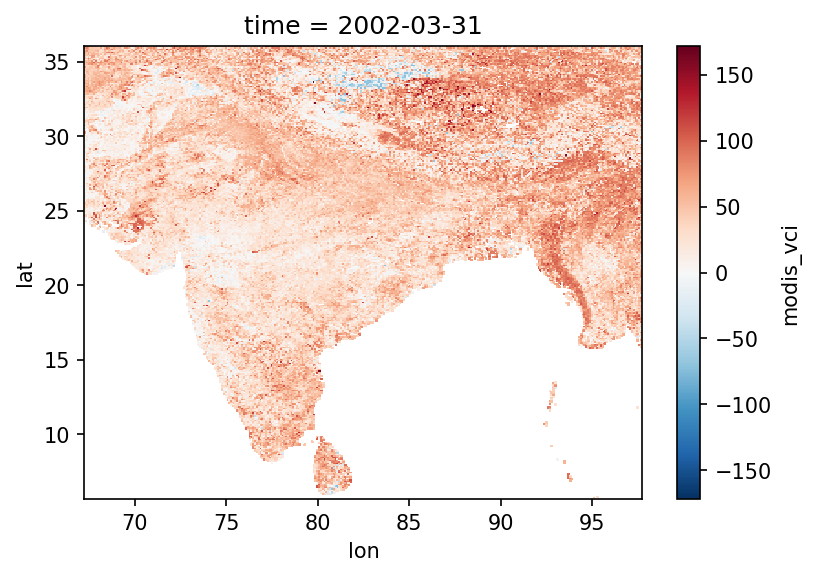

In [5]:
ds.isel(time=5)["modis_vci"].plot()

### Check the data

/home/tommy/miniconda3/envs/ml/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Mean Conditions BOKU VCI (unscaled) [2001-2020]')

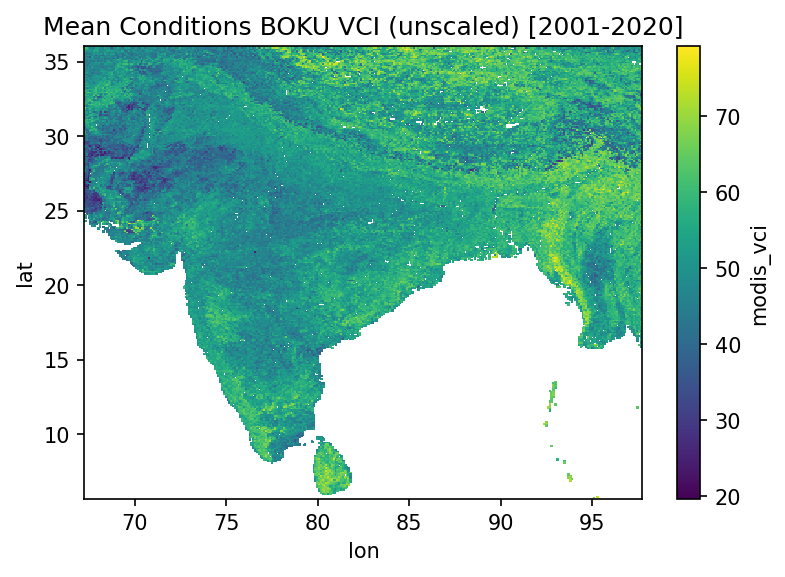

In [6]:
f, ax = plt.subplots()
ds.mean(dim="time")["modis_vci"].plot(ax=ax)
ax.set_title("Mean Conditions BOKU VCI [2001-2020]")

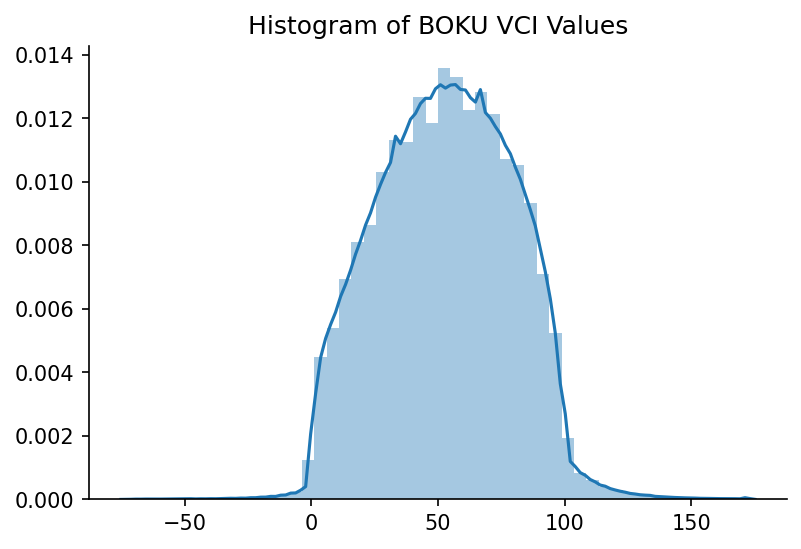

In [7]:
from src.utils import drop_nans_and_flatten

f, ax = plt.subplots()
sns.distplot(drop_nans_and_flatten(ds["modis_vci"]), ax=ax)
ax.set_title("Histogram of BOKU VCI Values")
sns.despine()

# Explore the target data

In [9]:
if True: #"all_data" not in globals().keys():
    experiment = "one_month_forecast"
    process_static = True

    engineer = Engineer(
        data_dir, experiment=experiment, process_static=process_static
    )
    all_data = engineer.engineer_class._make_dataset(static=False)

all_data.data_vars

Processing /cats/datastore/data/interim/VCI_preprocessed/data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/volumetric_soil_water_layer_1_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/volumetric_soil_water_layer_2_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/volumetric_soil_water_layer_3_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/volumetric_soil_water_layer_4_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/potential_evaporation_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/total_precipitation_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/2m_temperature_data_india.nc
Processing /cats/datastore/data/interi

Data variables:
    VCI            (time, lat, lon) float64 ...
    swvl1          (time, lat, lon) float32 ...
    swvl2          (time, lat, lon) float32 ...
    swvl3          (time, lat, lon) float32 ...
    swvl4          (time, lat, lon) float32 ...
    pev            (time, lat, lon) float32 ...
    tp             (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    e              (time, lat, lon) float32 ...
    t2m_std_1      (time, lat, lon) float64 ...
    t2m_mean_1     (time, lat, lon) float64 ...
    t2m_std_2      (time, lat, lon) float64 ...
    t2m_mean_2     (time, lat, lon) float64 ...
    t2m_std_3      (time, lat, lon) float64 ...
    t2m_mean_3     (time, lat, lon) float64 ...
    erate_std_1    (time, lat, lon) float64 ...
    erate_mean_1   (time, lat, lon) float64 ...
    erate_std_2    (time, lat, lon) float64 ...
    erate_mean_2   (time, lat, lon) float64 ...
    erate_std_3    (time, lat, lon) float64 ...
    erate_mean_3   (time

/home/tommy/miniconda3/envs/ml/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


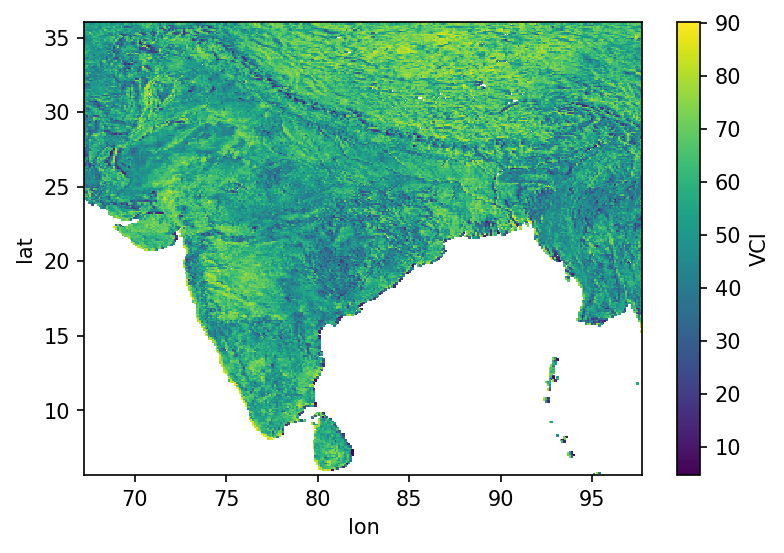

In [10]:
f, ax = plt.subplots()
all_data["VCI"] = all_data["VCI"].where(all_data["VCI"].mean(dim='time') != 0)
all_data["VCI"].mean(dim='time').plot()


In [25]:
new = all_data["modis_vci"]
orig = all_data["VCI"]

/home/tommy/miniconda3/envs/ml/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


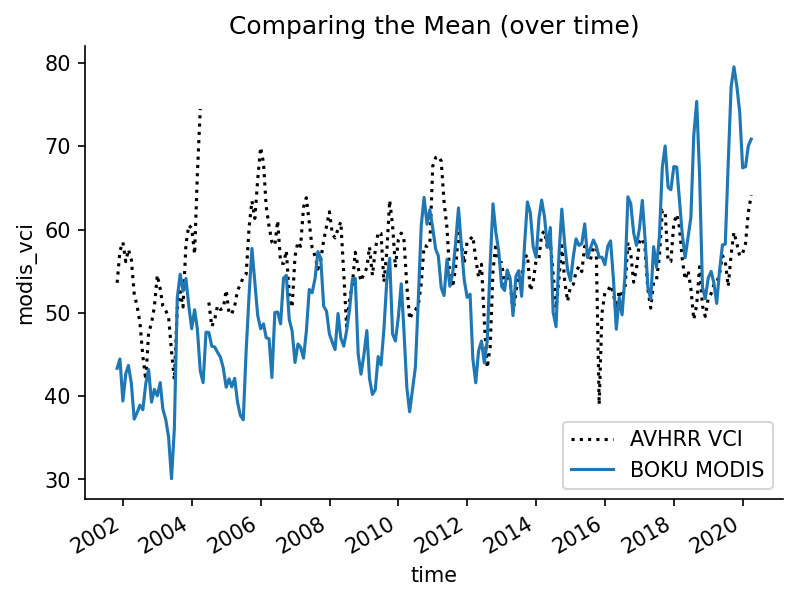

In [29]:
f, ax = plt.subplots()
orig.mean(dim=["lat", "lon"]).plot(label="AVHRR VCI", ax=ax, ls=":", color="k")
new.mean(dim=["lat", "lon"]).plot(label="BOKU MODIS", ax=ax)
plt.legend()
ax.set_title("Comparing the Mean (over time)")
sns.despine();

/home/tommy/miniconda3/envs/ml/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'AVHRR')

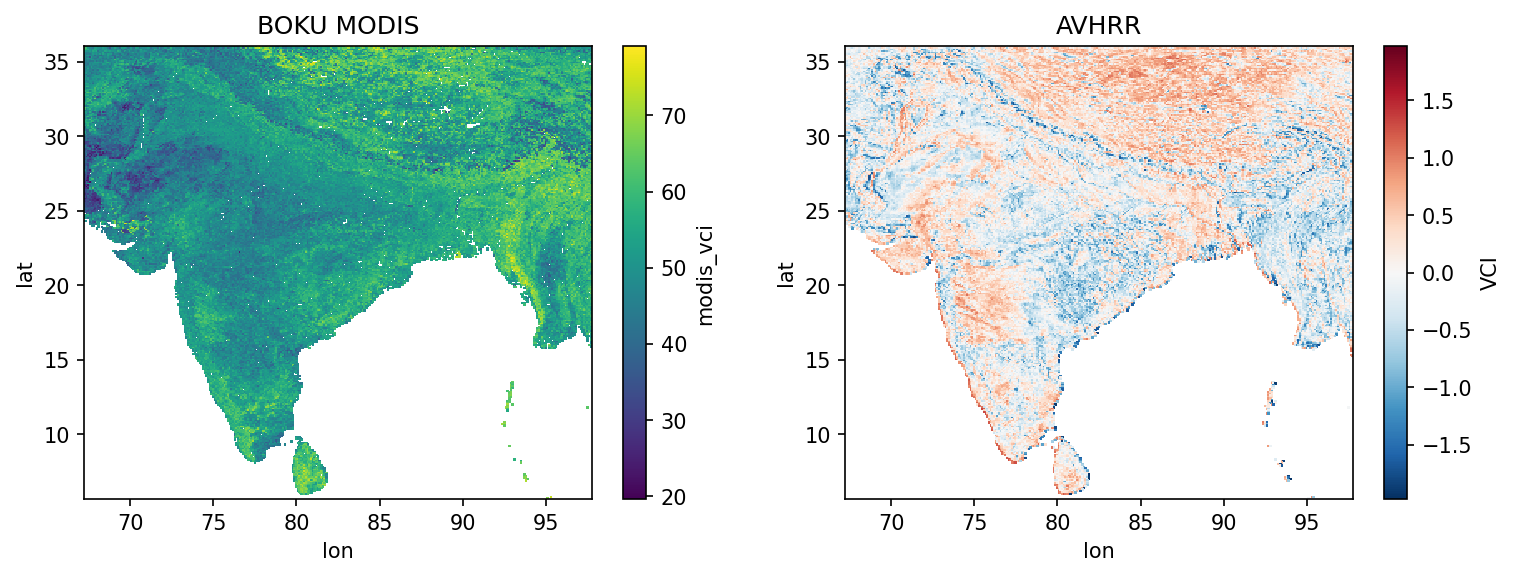

In [13]:
f, axs = plt.subplots(1, 2, figsize=(12, 4))
new.mean(dim=["time"]).plot(ax=axs[0])
axs[0].set_title("BOKU MODIS")
orig.mean(dim=["time"]).plot(ax=axs[1])
axs[1].set_title("AVHRR")

In [14]:
from src.analysis.evaluation import spatial_r2, spatial_rmse

test_times = pd.date_range("2015", "2020", freq="M")

orig_obs = orig.sel(time=test_times)
orig_persistence = orig.shift(time=1).sel(time=test_times)

new_obs = new.sel(time=test_times)
new_persistence = new.shift(time=1).sel(time=test_times)

new_r2 = spatial_r2(new_obs, new_persistence).rename("R2")
orig_r2 = spatial_r2(orig_obs, orig_persistence).rename("R2")

/home/tommy/ml_drought/src/analysis/evaluation.py:54: RuntimeWarning: invalid value encountered in true_divide
  r2_vals = 1 - (np.nansum((true_da.values - pred_da.values) ** 2, axis=0)) / (


Text(0.5, 1.0, 'AVHRR')

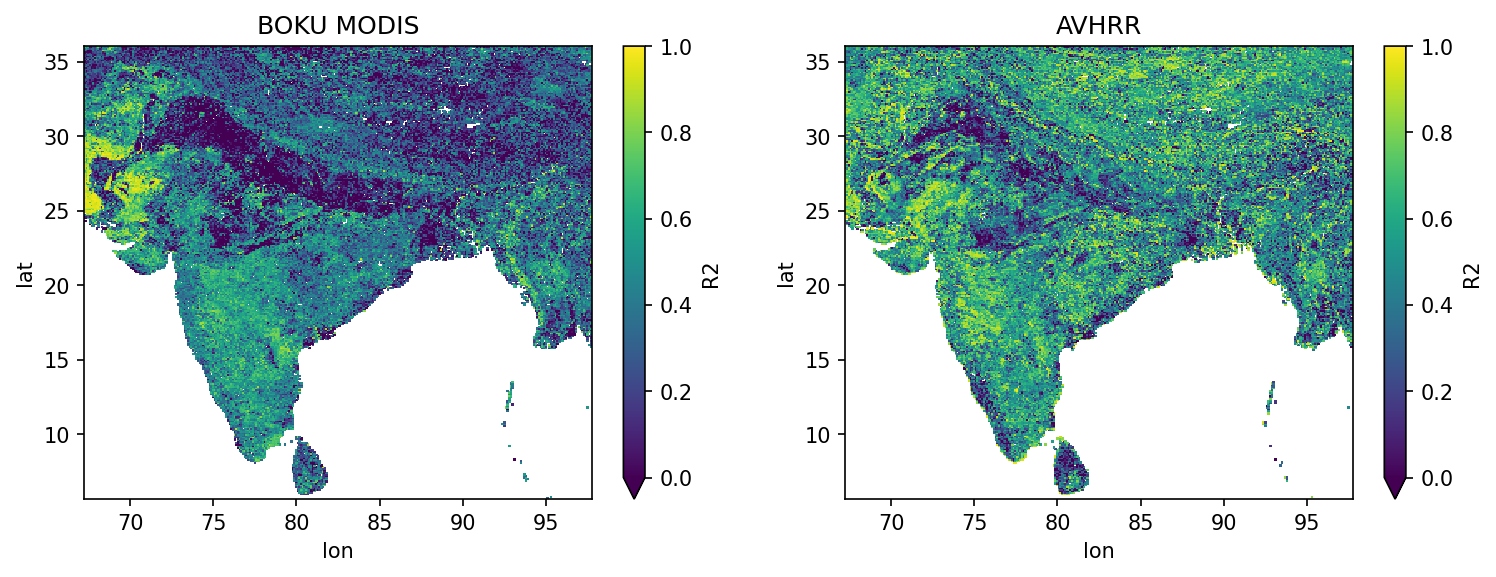

In [15]:
f, axs = plt.subplots(1, 2, figsize=(12, 4))

new_r2.plot(ax=axs[0], vmin=0, vmax=1)
axs[0].set_title("BOKU MODIS")
orig_r2.plot(ax=axs[1], vmin=0, vmax=1)
axs[1].set_title("AVHRR")

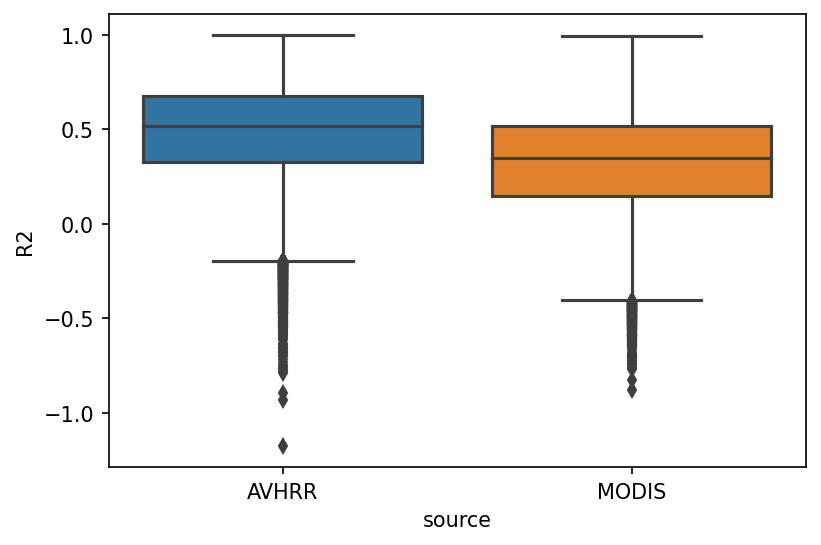

In [16]:
def stack_xr_to_df(ds: xr.Dataset) -> pd.DataFrame:
    stacked = ds.stack(pixel=["lat", "lon"]).drop("time")
    pixels_lookup = dict(enumerate(stacked["pixel"].values))
    stacked["pixel"] = np.arange(len(pixels_lookup))
    df = stacked.to_dataframe().dropna().reset_index()
    return df, pixels_lookup
    
new_r2_df, _ = stack_xr_to_df(new_r2)
orig_r2_df, _ = stack_xr_to_df(orig_r2)
new_r2_df["source"] = "MODIS"
orig_r2_df["source"] = "AVHRR"

r2 = pd.concat([orig_r2_df, new_r2_df])

sns.boxplot(x="source", y="R2", data=r2)

# Visualise Pixel Time Series

In [17]:
from scripts.models import get_all_vars, get_forecast_vars, get_ignore_static_vars
from src.engineer import Engineer

In [18]:
forecast_vars = get_forecast_vars()
ignore_static_vars = get_ignore_static_vars()

In [19]:
def create_pixel_based_index(data: pd.DataFrame) -> pd.DataFrame:
    # convert (lat, lon) MultiIndex to IntIndex
    if "time" in data.index.names:
        data = data.reset_index("time")
        
    assert all(np.isin(["lat", "lon"], data.index.names))
    assert "time" not in data.index.names
    
    # Reset index to pixel
    # build a (lat, lon) tuple -> int dict
    pixel_lookup: Dict[Tuple[float, float], int] = {v:k for (k, v) in enumerate(np.unique(data.index.values))}
    pixel_index = [pixel_lookup[v] for v in data.index.values]
    data.index = pd.Series(pixel_index, name="pixel")
    data = data.reset_index()

    return data, pixel_lookup

all_df = all_data.to_dataframe()
data, pixel_lookup = create_pixel_based_index(all_df.drop(forecast_vars, axis=1))
data = data.dropna()

data.head()

,pixel,time,VCI,swvl1,swvl2,swvl3,swvl4,pev,tp,t2m,e,modis_vci
0,92415,2001-10-31,44.804001,0.232926,0.224727,0.230749,0.279217,-0.002293,0.000256,284.805634,-0.000247,72.000000
1,92415,2001-11-30,59.547501,0.312335,0.273029,0.231114,0.278634,-0.001195,0.000655,279.538788,-0.000384,74.666667
2,92415,2001-12-31,60.332497,0.398925,0.355123,0.239818,0.278344,-0.000562,0.000947,272.955017,-0.000231,77.000000
3,92415,2002-01-31,52.499996,0.393908,0.374476,0.266675,0.282949,-0.000689,0.000509,270.129242,-0.000191,55.666667
4,92415,2002-02-28,69.387497,0.427445,0.410904,0.301859,0.282904,-0.000658,0.000909,271.377258,-0.000300,69.333333


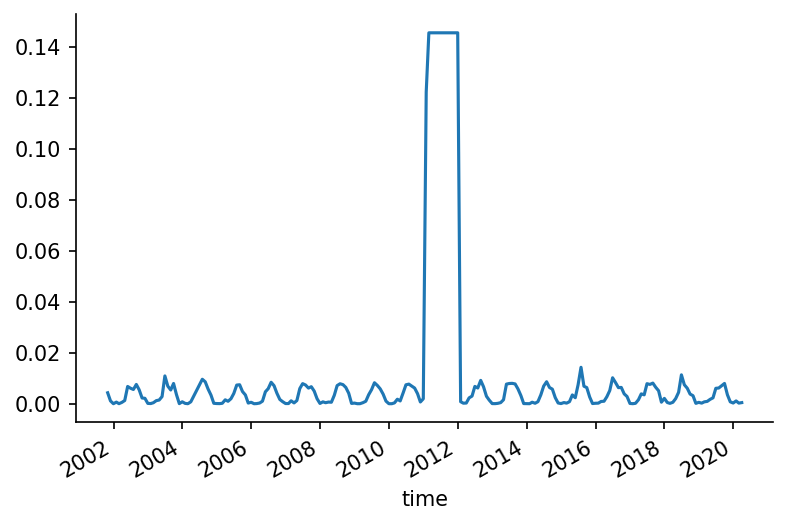

In [20]:
# There is an error in the precip data (drop 2011)
pixel_id = np.random.choice(data["pixel"])

plot_data = data.loc[data["pixel"] == pixel_id]
f, ax = plt.subplots()
plot_data[["time", "tp"]].set_index("time")['tp'].plot(ax=ax)

sns.despine()

# data = data.loc[~(data["time"].dt.year == 2011)]
# set to np.nan
data.loc[(data["time"].dt.year == 2011), "tp"] = np.nan

In [21]:
from typing import Optional
import matplotlib.dates as mdates

def plot_station_hydrograph(
    data: pd.DataFrame, 
    ax: Optional = None,
    plot_vars: str = ["modis_vci"],
    precip_var: str = "precipitation",
    precip_kwargs: Dict = {"alpha": 0.6},
    plot_kwargs: Dict = {"alpha": 1.0},
):
    assert all(np.isin(["time", ], data.columns))
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4))
    else:
        fig = plt.gcf()
    
    for ix, var in enumerate(plot_vars):
        ax.plot(data["time"], data[var], color=sns.color_palette()[ix], label=var, linewidth=2, **plot_kwargs)

    ax.legend()
    
    # Plot the rainfall too
    ax2 = ax.twinx()
    precip = data[precip_var]
    ax2.bar(data["time"], precip, **precip_kwargs)
    ax2.set_ylim([0, precip.max() + 6*precip.std()])
    ax2.set_yticklabels([])
    ax2.set_yticks([])
    ax2.invert_yaxis()

    ax.set_title(f"Observed data")  # \nNSE: {} -- Bias: {} -- {}
    ax.set_xlabel("Time")
    ax.set_ylabel("VCI")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()

    sns.despine()
    
    return f, ax


In [22]:
# # other variables
# f, ax = plt.subplots()
# ax.bar(plot_data["time"], plot_data["swvl1"], width=10)

<ipython-input-23-58b45e56bcc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data["rolling"] = plot_data.rolling(window=3).mean()["modis_vci"]


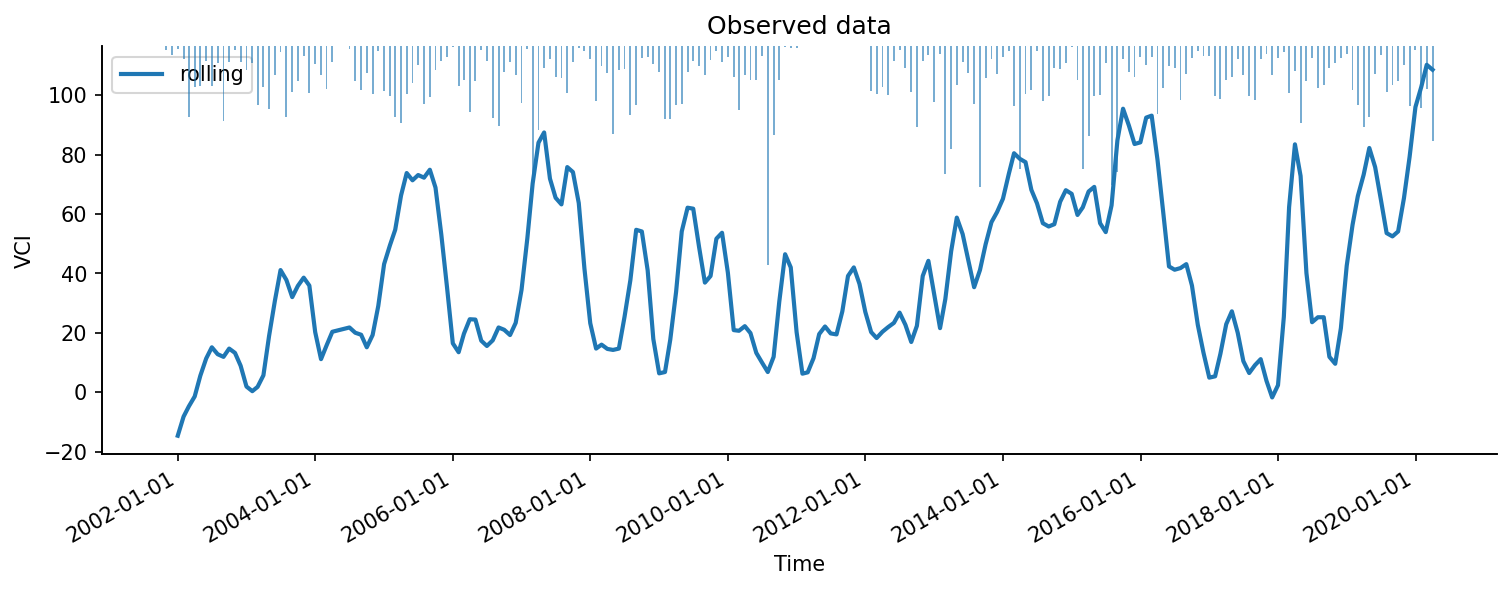

In [23]:
pixel_id = np.random.choice(data["pixel"])
plot_data = data.loc[data["pixel"] == pixel_id]
plot_data["rolling"] = plot_data.rolling(window=3).mean()["modis_vci"]

f, ax = plot_station_hydrograph(
    plot_data,
    plot_vars=["rolling"],
    precip_var="tp",
    precip_kwargs=dict(alpha=0.6, width=10),
    plot_kwargs=dict(alpha=1,),
)

# ax.plot(plot_data["time"], rolling_mean["modis_vci"], color=sns.color_palette()[1])

# Check for seasonality

In [36]:
# SPLINE (always runs through all points ...)
def smoothing_spline(X: np.ndarray, points: np.ndarray) -> Tuple[np.ndarray]:
    from scipy.interpolate import make_interp_spline, BSpline

    # 300 represents number of points to make between T.min and T.max
    xnew = np.linspace(X.min(), X.max(), 300) 

    spl: BSpline = make_interp_spline(X, points, k=2)  # type: BSpline
    y = spl(xnew)
    return xnew, y

### Plot seasonality of random points

/home/tommy/miniconda3/envs/ml/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/tommy/miniconda3/envs/ml/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


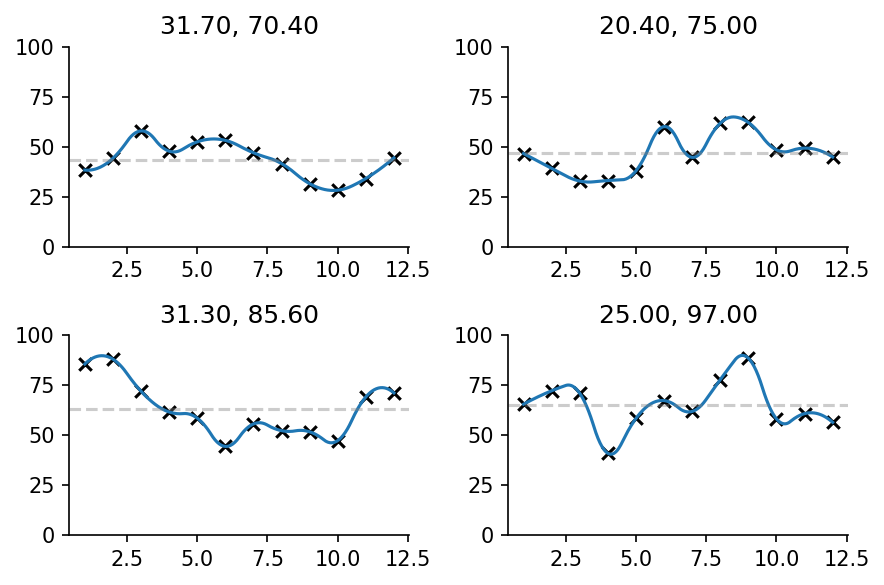

In [56]:
f, axs = plt.subplots(2, 2, figsize=(3*2, 2*2))

for ix in np.arange(4):
    
    # choose a random latlon point
    while all(np.isnan(y)):
        ilat = np.random.choice(np.arange(len(ds.lat)))
        ilon = np.random.choice(np.arange(len(ds.lon)))
        y = ds["modis_vci"].isel(lat=ilat, lon=ilon).groupby("time.month").mean().values
    lat = float(ds["modis_vci"].isel(lat=ilat, lon=ilon).lat.values)
    lon = float(ds["modis_vci"].isel(lat=ilat, lon=ilon).lon.values)
    X = np.arange(1, 13)
    xnew, smooth = smoothing_spline(X, y)
    
    ax = axs[np.unravel_index(ix, (2,2))]
    ax.scatter(X, y, marker="x", color="k")
    ax.plot(xnew, smooth)
    ax.set_ylim(0, 100)
    ax.axhline(y.mean(), alpha=0.4, color="grey", ls="--")
    ax.set_title(f"{lat:.2f}, {lon:.2f}")
    sns.despine()
    y = [np.nan]
    
plt.tight_layout()

# Test dataloading

In [57]:
if True: #"all_data" not in globals().keys():
    experiment = "one_month_forecast"
    process_static = True

    engineer = Engineer(
        data_dir, experiment=experiment, process_static=process_static
    )
    all_data = engineer.engineer_class._make_dataset(static=False)

all_data.data_vars

Processing /cats/datastore/data/interim/VCI_preprocessed/data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/volumetric_soil_water_layer_1_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/volumetric_soil_water_layer_2_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/volumetric_soil_water_layer_3_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/volumetric_soil_water_layer_4_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/potential_evaporation_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/total_precipitation_data_india.nc
Processing /cats/datastore/data/interim/reanalysis-era5-land-monthly-means_preprocessed/2m_temperature_data_india.nc
Processing /cats/datastore/data/interi

Data variables:
    VCI            (time, lat, lon) float64 ...
    swvl1          (time, lat, lon) float32 ...
    swvl2          (time, lat, lon) float32 ...
    swvl3          (time, lat, lon) float32 ...
    swvl4          (time, lat, lon) float32 ...
    pev            (time, lat, lon) float32 ...
    tp             (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    e              (time, lat, lon) float32 ...
    t2m_std_1      (time, lat, lon) float64 ...
    t2m_mean_1     (time, lat, lon) float64 ...
    t2m_std_2      (time, lat, lon) float64 ...
    t2m_mean_2     (time, lat, lon) float64 ...
    t2m_std_3      (time, lat, lon) float64 ...
    t2m_mean_3     (time, lat, lon) float64 ...
    erate_std_1    (time, lat, lon) float64 ...
    erate_mean_1   (time, lat, lon) float64 ...
    erate_std_2    (time, lat, lon) float64 ...
    erate_mean_2   (time, lat, lon) float64 ...
    erate_std_3    (time, lat, lon) float64 ...
    erate_mean_3   (time